In [ ]:
import pandas as pd

## 데이터 전처리

In [20]:
df = pd.read_csv("../data/combined/health_checkup_2022_2023.csv")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 33 columns):
 #   Column         Dtype  
---  ------         -----  
 0   기준년도           int64  
 1   가입자일련번호        int64  
 2   시도코드           int64  
 3   성별코드           int64  
 4   연령대코드(5세단위)    int64  
 5   신장(5cm단위)      int64  
 6   체중(5kg단위)      int64  
 7   허리둘레           float64
 8   시력(좌)          float64
 9   시력(우)          float64
 10  청력(좌)          float64
 11  청력(우)          float64
 12  수축기혈압          float64
 13  이완기혈압          float64
 14  식전혈당(공복혈당)     float64
 15  총콜레스테롤         float64
 16  트리글리세라이드       float64
 17  HDL콜레스테롤       float64
 18  LDL콜레스테롤       float64
 19  혈색소            float64
 20  요단백            float64
 21  혈청크레아티닌        float64
 22  혈청지오티(AST)     float64
 23  혈청지피티(ALT)     float64
 24  감마지티피          float64
 25  흡연상태           float64
 26  음주여부           float64
 27  구강검진수검여부       int64  
 28  치아우식증유무        float64
 29  결손치 유무        

In [22]:
df.columns

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5cm단위)',
       '체중(5kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석'],
      dtype='object')

In [24]:
drop_cols = [
    '결손치 유무', 
    '치아마모증유무', 
    '제3대구치(사랑니) 이상', 
    '치석', 
    '치아우식증유무', 
    '구강검진수검여부',
    '시력(좌)',
    '시력(우)', 
    '기준년도',
    '가입자일련번호',
    '시도코드'
]
df_drop = df.drop(columns=drop_cols)

### 제거한 컬럼
| 컬럼명 | 사유 |
|--------|------|
| 가입자일련번호, 기준년도 | 예측과 무관한 메타데이터 |
| 시도코드 | 지역별 유병률이 고혈압 예측 설득력 부족 판단 |
| 청력 | 예측과 직접 관련성 낮고 결측 있음 |
| 구강검진 및 치과 관련 항목 | 고혈압과 관련성 낮다고 판단 |

In [25]:
df_drop.columns

Index(['성별코드', '연령대코드(5세단위)', '신장(5cm단위)', '체중(5kg단위)', '허리둘레', '청력(좌)',
       '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드',
       'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)',
       '혈청지피티(ALT)', '감마지티피', '흡연상태', '음주여부'],
      dtype='object')

## 결측치 확인 및 제거

In [31]:
df_drop.isnull().sum()

성별코드                 0
연령대코드(5세단위)          0
신장(5cm단위)            0
체중(5kg단위)            0
허리둘레               803
청력(좌)              252
청력(우)              254
수축기혈압            11303
이완기혈압            11303
식전혈당(공복혈당)       11425
총콜레스테롤         1315776
트리글리세라이드       1315780
HDL콜레스테롤       1315780
LDL콜레스테롤       1328173
혈색소              11433
요단백              22210
혈청크레아티닌          11429
혈청지오티(AST)       11429
혈청지피티(ALT)       11429
감마지티피            11424
흡연상태               185
음주여부               129
dtype: int64

In [28]:
df_cleaned = df_drop.dropna()

In [34]:
df_cleaned.shape

(667798, 22)

In [33]:
df_cleaned.isnull().sum()

성별코드           0
연령대코드(5세단위)    0
신장(5cm단위)      0
체중(5kg단위)      0
허리둘레           0
청력(좌)          0
청력(우)          0
수축기혈압          0
이완기혈압          0
식전혈당(공복혈당)     0
총콜레스테롤         0
트리글리세라이드       0
HDL콜레스테롤       0
LDL콜레스테롤       0
혈색소            0
요단백            0
혈청크레아티닌        0
혈청지오티(AST)     0
혈청지피티(ALT)     0
감마지티피          0
흡연상태           0
음주여부           0
dtype: int64

### 결측치 처리 전략

- **혈액 데이터가 없는 경우 전체 행 제거**
- 평균/중앙값 대체 → 왜곡 우려 있음
- 최종 데이터: **667,798건 (결측 없는 완전한 샘플)**
- **혈액검사 지표 포함된 사람만 분석 대상**

### 의사결정 근거

- 본 프로젝트는 **혈액 데이터 기반 고혈압 예측**을 목표로 함
- 200만개 → 667,798개로 66%가 줄었지만 충분한 데이터량으로 판단
- 따라서 **혈액지표 결측이 있는 사람은 예측 대상 아님**
- 정제된 완전 데이터셋을 통해 **신뢰성 있는 모델 학습 가능**

In [36]:
df_cleaned.to_csv("../data/processed/health_checkup_cleaned.csv", index=False, encoding='utf-8-sig')

## 이상치 탐지 및 제거

### 반드시 이상치 탐지를 적용해야 하는 피처
이 변수들은 고혈압 예측과 직접적인 연관이 있고,  
극단값이 실제 예측 성능과 해석력에 영향을 줄 수 있으므로 반드시 이상치 탐지가 필요

- 수축기혈압
- 이완기혈압
- 식전혈당(공복혈당)
- 총콜레스테롤
- 트리글리세라이드
- HDL콜레스테롤
- LDL콜레스테롤

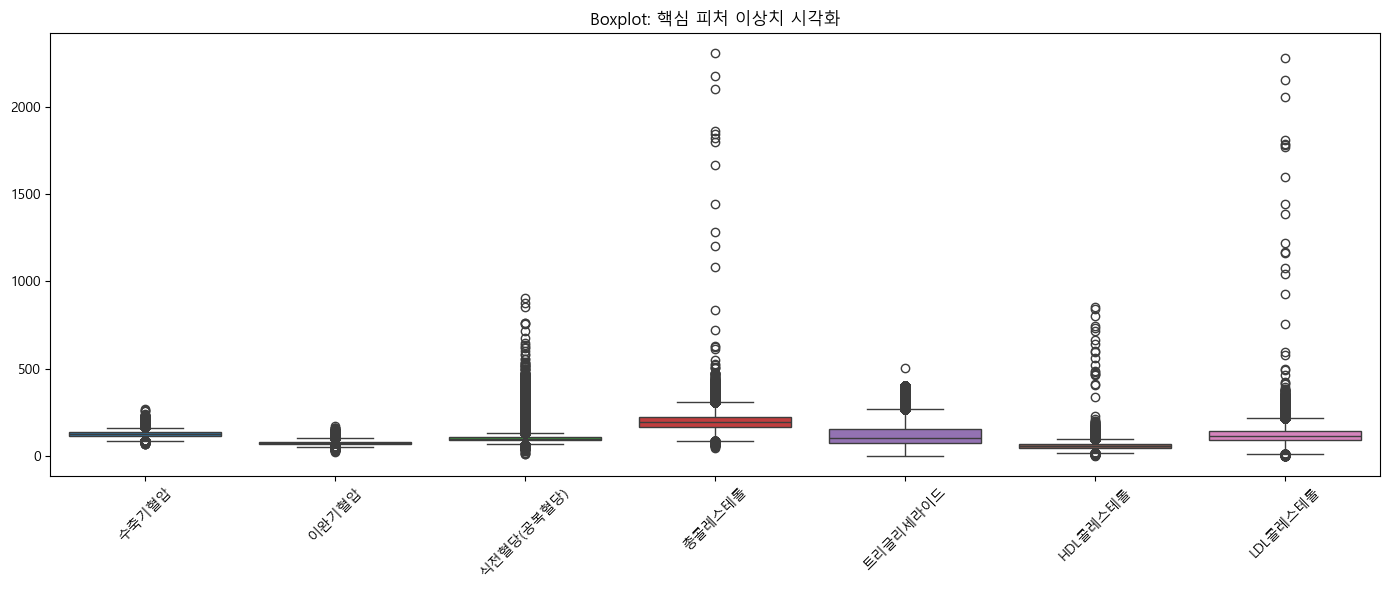

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows의 경우)
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우: 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False      # 마이너스 기호 깨짐 방지

essential_cols = [
    '수축기혈압', '이완기혈압', '식전혈당(공복혈당)',
    '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤'
]

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_cleaned[essential_cols])
plt.title("Boxplot: 핵심 피처 이상치 시각화")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
# 핵심 피처 목록
essential_cols = [
    '수축기혈압', '이완기혈압', '식전혈당(공복혈당)',
    '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤'
]

# 이상치 비율 저장용 리스트
iqr_result = []

for col in essential_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df_cleaned[col] < lower) | (df_cleaned[col] > upper)).sum()
    ratio = round(outliers / len(df_cleaned) * 100, 2)

    iqr_result.append({
        '변수명': col,
        '이상치 수': outliers,
        '전체 대비 비율 (%)': ratio
    })

# 결과 테이블
pd.DataFrame(iqr_result)

,변수명,이상치 수,전체 대비 비율 (%)
0,수축기혈압,8443,1.26
1,이완기혈압,11359,1.70
2,식전혈당(공복혈당),45422,6.80
3,총콜레스테롤,5376,0.81
4,트리글리세라이드,28983,4.34
5,HDL콜레스테롤,11900,1.78
6,LDL콜레스테롤,4999,0.75


In [ ]:
# IQR 기준 계산
Q1 = df_cleaned['수축기혈압'].quantile(0.25)
Q3 = df_cleaned['수축기혈압'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# IQR 이상치만 추출
iqr_outliers = df_cleaned[(df_cleaned['수축기혈압'] < lower) | (df_cleaned['수축기혈압'] > upper)]

# 이상치 수치 확인 (정렬해서 상위/하위 값 보기)
iqr_outliers_sorted = iqr_outliers['수축기혈압'].sort_values()

# 상위 10개, 하위 10개 확인
print(" 하위 이상치 (낮은 수축기혈압):")
print(iqr_outliers_sorted.head(10))

print("\n 상위 이상치 (높은 수축기혈압):")
print(iqr_outliers_sorted.tail(10))

 하위 이상치 (낮은 수축기혈압):
997893     66.0
1438808    68.0
865580     70.0
1232303    70.0
888536     72.0
1868665    72.0
1443452    74.0
1674264    74.0
1779555    75.0
906525     75.0
Name: 수축기혈압, dtype: float64

 상위 이상치 (높은 수축기혈압):
931669     230.0
1332565    230.0
928297     233.0
920285     233.0
910744     236.0
793845     242.0
825602     255.0
1810026    255.0
894723     260.0
871678     269.0
Name: 수축기혈압, dtype: float64
 혈압 범위: 
수축기혈압
170.0    814
165.0    692
164.0    669
163.0    638
166.0    568
        ... 
228.0      1
236.0      1
242.0      1
260.0      1
269.0      1
Name: count, Length: 89, dtype: int64


In [50]:
print(" 혈압 범위: ")
print(iqr_outliers_sorted.value_counts())

 혈압 범위: 
수축기혈압
170.0    814
165.0    692
164.0    669
163.0    638
166.0    568
        ... 
228.0      1
236.0      1
242.0      1
260.0      1
269.0      1
Name: count, Length: 89, dtype: int64


초기에는 IQR 기반의 이상치 탐지를 적용하였으나, 실제 탐지된 값 중 수축기혈압 170, 165 등 고혈압 진단 기준(≥140)에 해당하는 값이 포함됨을 확인

이는 우리가 예측하고자 하는 타겟(고혈압 위험군)을 제거하는 결과로 이어질 수 있기 때문에,  
IQR 대신 도메인 기반 허용 범위를 기준으로 이상치 제거 기준을 수정

| 변수명      | 정상 범위 (의학적 기준)          | 허용 범위 | 기준 이유                             |
| -------- | ----------------------- | --------------------- | ---------------------------------- |
| 수축기혈압    | 90 \~ 139 mmHg          | **80 \~ 250 mmHg**    | 고혈압 기준(140 이상) 포함 + 250 이상은 오류 가능성 |
| 이완기혈압    | 60 \~ 89 mmHg           | **40 \~ 150 mmHg**    | 저혈압 포함. 150 이상은 생리적 한계 이상          |
| 공복혈당     | 70 \~ 99 mg/dL          | **50 \~ 300 mg/dL**   | 당뇨 환자 포함. 300 이상은 측정기 오류 가능성       |
| 총콜레스테롤   | < 200 mg/dL (권장 상한 239) | **100 \~ 400 mg/dL**  | 고지혈증 포함. 400 이상은 통계적으로 극히 드묾       |
| 트리글리세라이드 | < 150 mg/dL             | **20 \~ 500 mg/dL**   | 고중성지방 포함. 500 이상은 의심 대상            |
| HDL콜레스테롤 | 남: >40 / 여: >50         | **10 \~ 150 mg/dL**   | 극저수치 허용. 10 이하 or 150 이상은 의심       |
| LDL콜레스테롤 | < 130 mg/dL (위험: >160)  | **10 \~ 300 mg/dL**   | 고지혈증 포함. 300 이상은 드문 사례             |

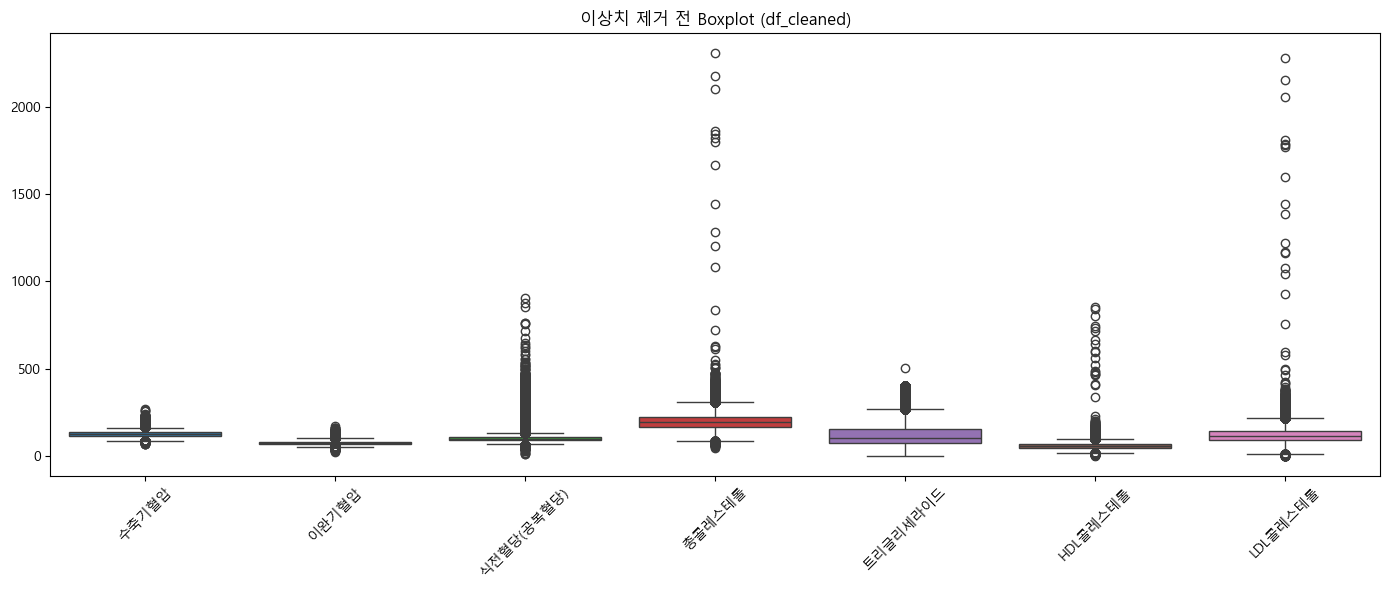

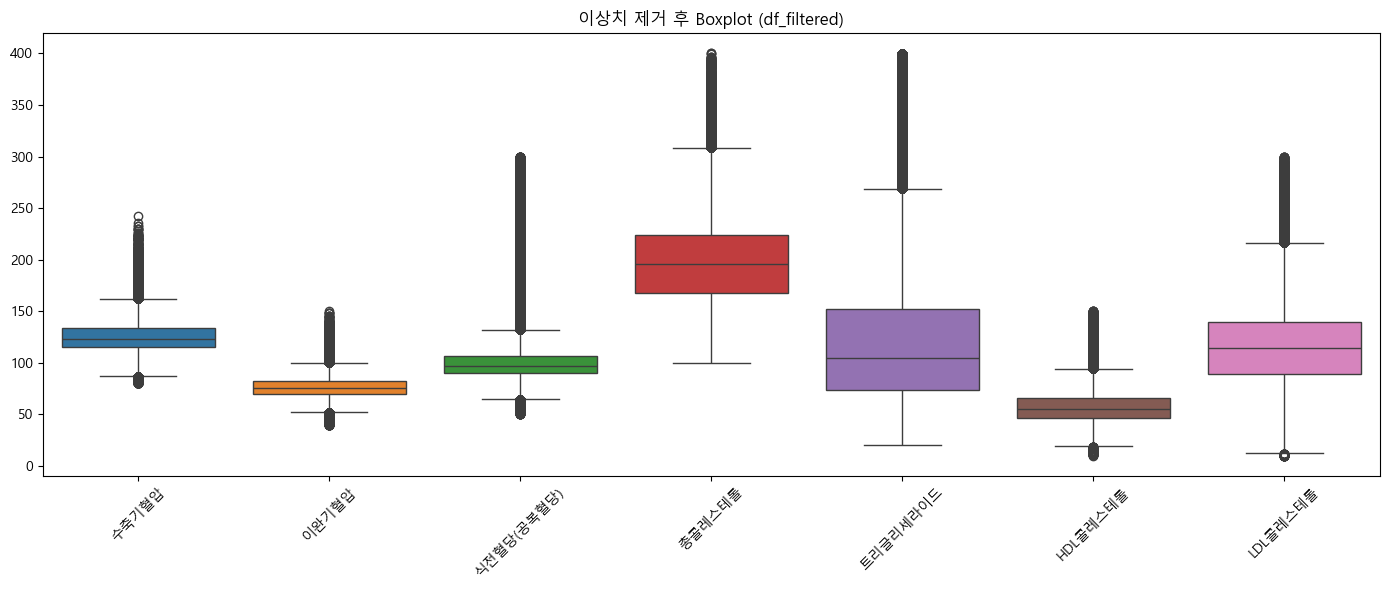

In [59]:
import seaborn as sns

# 허용 범위 기준 (의학 기반)
range_dict = {
    '수축기혈압': (80, 250),
    '이완기혈압': (40, 150),
    '식전혈당(공복혈당)': (50, 300),
    '총콜레스테롤': (100, 400),
    '트리글리세라이드': (20, 500),
    'HDL콜레스테롤': (10, 150),
    'LDL콜레스테롤': (10, 300)
}

# 원본 보존
df_filtered = df_cleaned.copy()

# 이상치 제거 적용
for col, (low, high) in range_dict.items():
    df_filtered = df_filtered[(df_filtered[col] >= low) & (df_filtered[col] <= high)]

# 시각화 전 Boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_cleaned[list(range_dict.keys())])
plt.title("이상치 제거 전 Boxplot (df_cleaned)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 시각화 후 Boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_filtered[list(range_dict.keys())])
plt.title("이상치 제거 후 Boxplot (df_filtered)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 663659 entries, 654336 to 1999996
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   성별코드         663659 non-null  int64  
 1   연령대코드(5세단위)  663659 non-null  int64  
 2   신장(5cm단위)    663659 non-null  int64  
 3   체중(5kg단위)    663659 non-null  int64  
 4   허리둘레         663659 non-null  float64
 5   청력(좌)        663659 non-null  float64
 6   청력(우)        663659 non-null  float64
 7   수축기혈압        663659 non-null  float64
 8   이완기혈압        663659 non-null  float64
 9   식전혈당(공복혈당)   663659 non-null  float64
 10  총콜레스테롤       663659 non-null  float64
 11  트리글리세라이드     663659 non-null  float64
 12  HDL콜레스테롤     663659 non-null  float64
 13  LDL콜레스테롤     663659 non-null  float64
 14  혈색소          663659 non-null  float64
 15  요단백          663659 non-null  float64
 16  혈청크레아티닌      663659 non-null  float64
 17  혈청지오티(AST)   663659 non-null  float64
 18  혈청지피티(ALT)   663659 non

### 조건부로 이상치 탐지를 고려할 피처
이 변수들은 이상치가 있을 수는 있지만,  
실제 특성일 가능성도 높아 시각화를 통해 분포를 확인한 뒤 제거 여부를 판단

- 신장(5cm단위)
- 체중(5kg단위)
- 허리둘레
- 혈색소
- 혈청크레아티닌
- 혈청지오티(AST)
- 혈청지피티(ALT)
- 감마지티피

In [62]:
conditional_cols = [
    '신장(5cm단위)', '체중(5kg단위)', '허리둘레',
    '혈색소', '혈청크레아티닌', '혈청지오티(AST)',
    '혈청지피티(ALT)', '감마지티피'
]

# df_filtered 기준으로 기초 통계 확인
df_filtered[conditional_cols].describe()

,신장(5cm단위),체중(5kg단위),허리둘레,혈색소,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피
count,663659.000000,663659.000000,663659.000000,663659.000000,663659.000000,663659.000000,663659.000000,663659.000000
mean,162.377049,64.440307,82.254933,14.256123,0.848637,27.767691,27.202368,36.239013
std,9.660300,13.528839,10.162366,1.552893,0.308739,20.593080,25.123042,60.003689
min,130.000000,30.000000,7.600000,0.200000,0.060000,1.000000,1.000000,1.000000
25%,155.000000,55.000000,75.000000,13.200000,0.700000,20.000000,16.000000,16.000000
50%,160.000000,65.000000,82.000000,14.300000,0.800000,24.000000,21.000000,23.000000
75%,170.000000,75.000000,89.000000,15.400000,1.000000,30.000000,31.000000,38.000000
max,195.000000,135.000000,999.000000,25.000000,60.000000,3711.000000,4390.000000,9999.000000


조건부 이상치 탐지 대상 피처들에 대해 기초 통계량을 확인한 결과,  
허리둘레(999), 감마지티피(9999), AST/ALT(3000~4000대)와 같이  
명백한 입력 오류 또는 센서 오작동 가능성이 있는 극단값이 존재하였다.  
따라서 도메인 지식과 생리학적 한계를 반영하여 다음 기준으로 이상치를 제거

| 변수명             | 제거 기준           | 제거 필요 여부 | 기준 이유                                 |
| --------------- | --------------- | -------- | ------------------------------------- |
| **신장(5cm단위)**   | 없음              | 제거 안 함 | 130\~195cm는 생리적으로 가능한 키 범위            |
| **체중(5kg단위)**   | 없음              | 제거 안 함 | 135kg는 현실적으로 존재 가능. 단위 해석 오해 없음       |
| **허리둘레**        | 허리둘레 > 200      | 제거 필요  | 200cm 이상은 생리적으로 불가능하며 입력 오류 가능성 큼     |
| **혈색소**         | 혈색소 < 4 또는 > 20 | 제거 필요  | 4 미만은 생명 유지 불가, 20 초과는 병적 상태로 이상치 가능성 |
| **혈청크레아티닌**     | 혈청크레아티닌 > 6     | 제거 필요  | 말기 신부전 이상 수치. 일반적 생리 범위 벗어남           |
| **AST (혈청지오티)** | AST > 500       | 제거 필요  | 간기능 수치. 500 이상은 오류 또는 드문 병적 상태        |
| **ALT (혈청지피티)** | ALT > 500       | 제거 필요  | AST와 동일                               |
| **감마지티피**       | 감마지티피 > 700     | 제거 필요  | 700 이상은 일반적이지 않으며, 단위 오류 또는 측정 오류 가능성 |


In [77]:
# df_filtered를 복사하여 이상치 제거용 최종 데이터프레임 생성
df_filtered2 = df_filtered.copy()

# 조건부 이상치 제거 기준 적용
df_filtered2 = df_filtered2[
    (df_filtered2['허리둘레'] <= 200) &
    (df_filtered2['혈색소'] >= 4) & (df_filtered2['혈색소'] <= 20) &
    (df_filtered2['혈청크레아티닌'] <= 6) &
    (df_filtered2['혈청지오티(AST)'] <= 500) &
    (df_filtered2['혈청지피티(ALT)'] <= 500) &
    (df_filtered2['감마지티피'] <= 700)
]

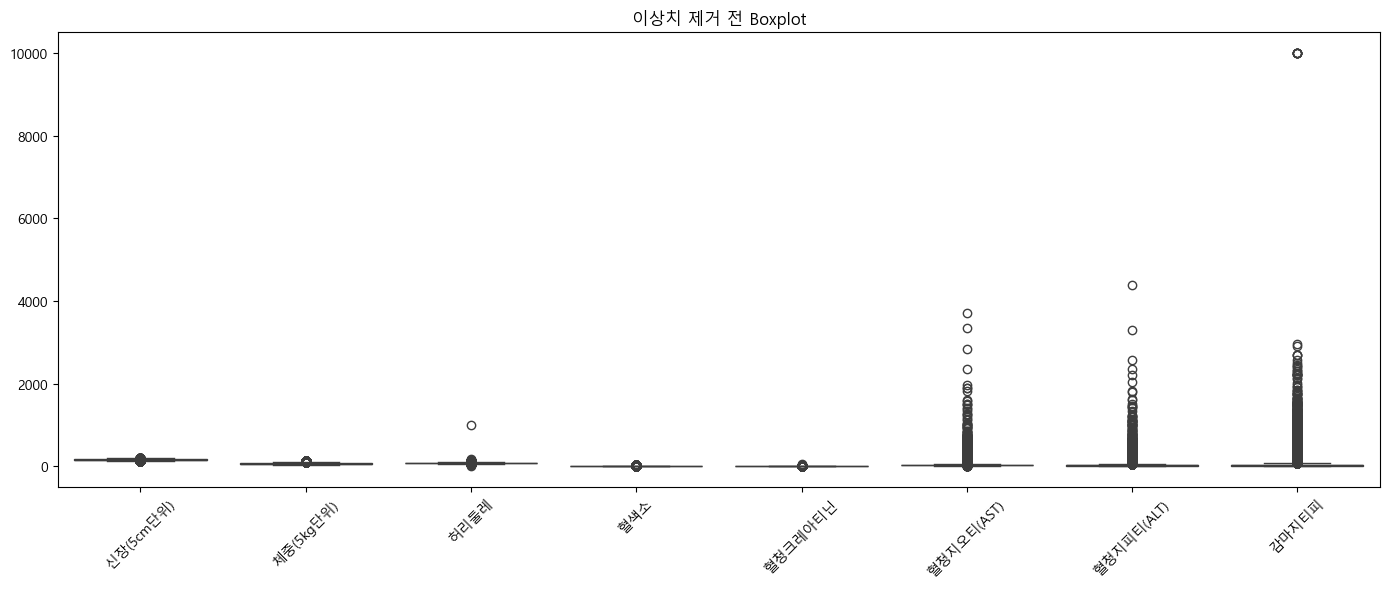

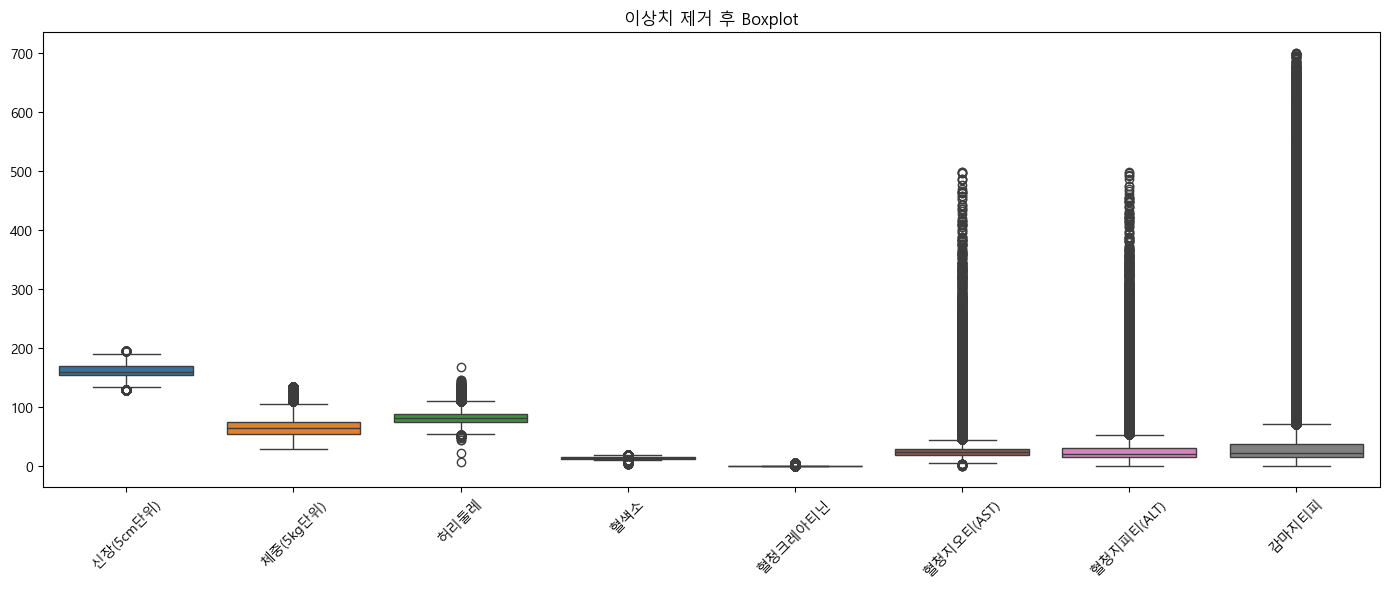

In [78]:
# 시각화 대상 피처
conditional_cols = [
    '신장(5cm단위)', '체중(5kg단위)', '허리둘레',
    '혈색소', '혈청크레아티닌', '혈청지오티(AST)',
    '혈청지피티(ALT)', '감마지티피'
]

# 이상치 제거 전
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_filtered[conditional_cols])
plt.title("이상치 제거 전 Boxplot")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 이상치 제거 후
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_filtered2[conditional_cols])
plt.title("이상치 제거 후 Boxplot")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 이상치 탐지 대상이 아닌 피처
이 변수들은 범주형이거나 정해진 값만 존재하므로,  
이상치 개념이 적용되지 않음.

- 성별코드
- 연령대코드(5세단위)
- 청력(좌)
- 청력(우)
- 요단백
- 흡연상태
- 음주여부

이상치는 도메인 기반 허용 범위를 기준으로 제거 
이는 생리학적으로 불가능하거나 측정 오류로 판단되는 극단값만을 제거하는 방식이며,  
예측 타겟이 될 수 있는 고위험 수치는 통계적 이상치(IQR) 기준이라 하더라도 유지

조건부 피처의 경우에도 임상적 판단과 분포 특성을 고려하여 필요한 경우에만 이상치를 제거 
이상의 전처리로 본 프로젝트의 이상치 제거는 마무리되었으며,  
향후 모델 학습 과정에서 변수별 영향도에 따라 추가 점검할 예정